In [80]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [81]:
from torchvision import datasets
from torchvision.transforms import ToTensor
trainData = datasets.MNIST(root='data', transform=ToTensor(), download=True)
testData = datasets.MNIST(root='data', train=False, transform=ToTensor(), download=True)

In [82]:
# number of pictures
len(trainData), len(testData)

(60000, 10000)

In [83]:
classNames = trainData.classes
classNames, len(classNames)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 10)

In [84]:
from torch.utils.data import DataLoader
batchSize = 32
trainDL = DataLoader(trainData, batchSize)
testDL = DataLoader(testData, batchSize)
# length of a DL is how many batches it has
len(trainDL), len(testDL), len(trainDL) * batchSize, len(testDL) * batchSize

(1875, 313, 60000, 10016)

In [85]:
firstBatch = next(iter(trainDL))
firstBatchImages, firstBatchLabels = firstBatch
firstBatchImages.shape, firstBatchLabels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [86]:
from torch import nn
image = firstBatchImages[0]
flatten = nn.Flatten()
flatImage = flatten(image)
image.shape, flatImage.shape, 28*28

(torch.Size([1, 28, 28]), torch.Size([1, 784]), 784)

In [87]:
class Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )
    def forward(self, x):
        return self.stack(x)
model = Model(input_shape=28*28, hidden_units=10, output_shape=len(classNames))
model.to(device), next(model.parameters()).device

(Model(
   (stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 device(type='cuda', index=0))

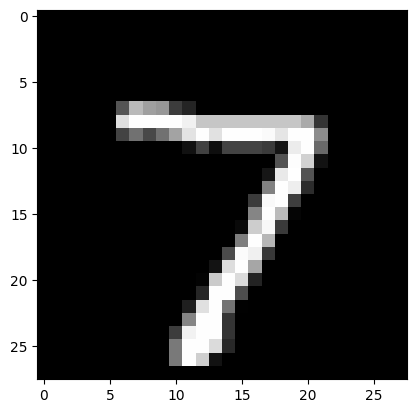

output=tensor([[-0.2099, -0.1817,  0.1707,  0.2203,  0.1850, -0.1956, -0.1923,  0.0126,
         -0.0793,  0.1741]], device='cuda:0', grad_fn=<AddmmBackward0>)
Image Number: 0 |Prediction: 3 | Label: 7


In [88]:
import matplotlib.pyplot as plt
def check_prediction(number):
    img, lbl = testData[number]
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()
    output = model(img.to(device))
    print(f'{output=}')
    print(f'Image Number: {number} |Prediction: {output.argmax().item()} | Label: {lbl}')
check_prediction(0)

In [89]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
lossFun = nn.CrossEntropyLoss()
epochs = 30
incorrect = []
for epoch in range(epochs):
    trainLoss = 0
    model.train()
    for batchCounter, (currentBatch, currentLabels) in enumerate(trainDL):
        currentBatch = currentBatch.to(device)
        currentLabels = currentLabels.to(device)
        yPred = model(currentBatch)
        
        loss = lossFun(yPred, currentLabels)
        trainLoss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    # loss for all the batches divided by the number of batches
    trainLoss /= len(trainDL)
    
    testLoss = 0
    accuracy = 0
    model.eval()
    with torch.inference_mode():
        for batchCounter, (currentBatch, currentLabels) in enumerate(testDL):
            currentBatch = currentBatch.to(device)
            currentLabels = currentLabels.to(device)
            testPred = model(currentBatch)            
            testLoss = lossFun(testPred, currentLabels)
            for imageCounter, (pred, target) in enumerate(zip(testPred, currentLabels)):
                if pred.argmax().item() == target.item():
                    accuracy += 1
                elif epoch == epochs - 1:
                    incorrect.append(batchCounter * batchSize + imageCounter) 
        # this needs inference mode
        testLoss /= len(testDL)
    accuracy = accuracy / len(testData)
    print(f'Epoch: {epoch:02} | Test loss: {testLoss:.4f} | Train loss: {trainLoss:.4f} | Accuracy: {accuracy*100:.2f}%')

Epoch: 00 | Test loss: 0.0009 | Train loss: 0.8584 | Accuracy: 88.78%
Epoch: 01 | Test loss: 0.0006 | Train loss: 0.3897 | Accuracy: 90.30%
Epoch: 02 | Test loss: 0.0005 | Train loss: 0.3425 | Accuracy: 91.19%
Epoch: 03 | Test loss: 0.0005 | Train loss: 0.3218 | Accuracy: 91.57%
Epoch: 04 | Test loss: 0.0005 | Train loss: 0.3094 | Accuracy: 91.77%
Epoch: 05 | Test loss: 0.0005 | Train loss: 0.3009 | Accuracy: 91.95%
Epoch: 06 | Test loss: 0.0005 | Train loss: 0.2945 | Accuracy: 92.00%
Epoch: 07 | Test loss: 0.0005 | Train loss: 0.2895 | Accuracy: 92.06%
Epoch: 08 | Test loss: 0.0004 | Train loss: 0.2855 | Accuracy: 92.12%
Epoch: 09 | Test loss: 0.0004 | Train loss: 0.2821 | Accuracy: 92.13%
Epoch: 10 | Test loss: 0.0004 | Train loss: 0.2792 | Accuracy: 92.18%
Epoch: 11 | Test loss: 0.0004 | Train loss: 0.2767 | Accuracy: 92.18%
Epoch: 12 | Test loss: 0.0004 | Train loss: 0.2744 | Accuracy: 92.21%
Epoch: 13 | Test loss: 0.0004 | Train loss: 0.2724 | Accuracy: 92.19%
Epoch: 14 | Test los

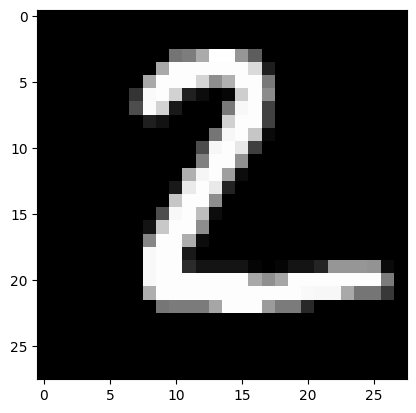

output=tensor([[  7.3778,   0.8611,  13.8989,   8.6443, -15.3704,   9.5308,   9.5814,
         -22.0856,   6.9702, -12.3564]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Image Number: 1 |Prediction: 2 | Label: 2


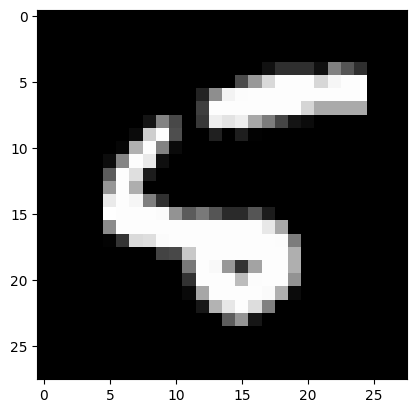

output=tensor([[ 3.9921, -7.6066,  0.9756, -8.3138,  4.4931,  5.3810, 12.2714, -9.5045,
          2.8430, -0.9330]], device='cuda:0', grad_fn=<AddmmBackward0>)
Image Number: 8 |Prediction: 6 | Label: 5


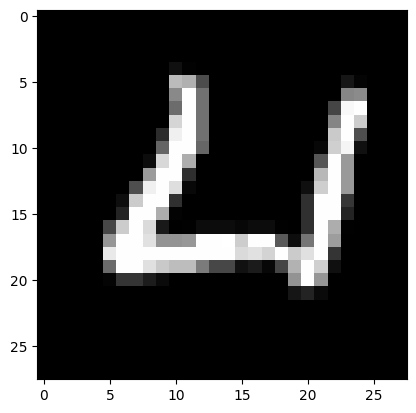

output=tensor([[  7.6833, -13.3434,   2.0548,  -9.4831,   5.5199,   6.3046,   7.8725,
          -4.7338,   2.5139,  -1.0882]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Image Number: 33 |Prediction: 6 | Label: 4


In [90]:
check_prediction(1)
check_prediction(incorrect[0])
check_prediction(incorrect[1])